In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_path = os.path.join('./data/DATASETv7/TRAIN')
test_path = os.path.join('./data/DATASETv7/TEST')
img_size = 224

In [14]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_size, img_size),
    class_mode = 'categorical',
    subset = 'training'
)

val_generator = val_datagen.flow_from_directory(
    train_path,
    target_size = (img_size, img_size),
    class_mode = 'categorical',
    subset = 'validation'
)

test_generator = val_datagen.flow_from_directory(
    test_path,
    batch_size = 300,
    target_size = (img_size, img_size),
)

Found 840 images belonging to 15 classes.
Found 210 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [4]:
IMG_SHAPE = (img_size, img_size, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [5]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(15, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 10,288,207
Trainable params: 8,030,223
Non-trainable params: 2,257,984
_____________________________________

In [6]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(), 
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(train_generator, 
                    epochs=20, 
                    validation_data = val_generator) 

Epoch 1/20
27/27 [==============================] - 33s 984ms/step - loss: 4.5413 - accuracy: 0.1536 - val_loss: 2.3449 - val_accuracy: 0.2333
Epoch 2/20
27/27 [==============================] - 26s 978ms/step - loss: 2.1471 - accuracy: 0.3107 - val_loss: 2.0513 - val_accuracy: 0.3667
Epoch 3/20
27/27 [==============================] - 26s 969ms/step - loss: 1.7671 - accuracy: 0.4429 - val_loss: 1.8476 - val_accuracy: 0.4762
Epoch 4/20
27/27 [==============================] - 27s 978ms/step - loss: 1.5936 - accuracy: 0.4905 - val_loss: 1.9123 - val_accuracy: 0.4905
Epoch 5/20
27/27 [==============================] - 26s 949ms/step - loss: 1.4883 - accuracy: 0.5333 - val_loss: 1.8117 - val_accuracy: 0.5143
Epoch 6/20
27/27 [==============================] - 26s 964ms/step - loss: 1.3375 - accuracy: 0.6071 - val_loss: 1.4065 - val_accuracy: 0.6238
Epoch 7/20
27/27 [==============================] - 26s 974ms/step - loss: 1.0435 - accuracy: 0.6524 - val_loss: 1.4665 - val_accuracy: 0.6000

In [8]:
history = model.fit(train_generator, 
                    epochs=20, 
                    validation_data = val_generator)

Epoch 1/20
27/27 [==============================] - 27s 1s/step - loss: 0.3746 - accuracy: 0.8726 - val_loss: 1.6257 - val_accuracy: 0.6476
Epoch 2/20
27/27 [==============================] - 27s 997ms/step - loss: 0.3488 - accuracy: 0.8964 - val_loss: 1.8765 - val_accuracy: 0.6524
Epoch 3/20
27/27 [==============================] - 27s 980ms/step - loss: 0.3092 - accuracy: 0.9119 - val_loss: 1.6682 - val_accuracy: 0.6857
Epoch 4/20
27/27 [==============================] - 27s 994ms/step - loss: 0.2743 - accuracy: 0.9119 - val_loss: 1.6364 - val_accuracy: 0.6619
Epoch 5/20
27/27 [==============================] - 27s 985ms/step - loss: 0.2279 - accuracy: 0.9274 - val_loss: 1.6858 - val_accuracy: 0.6762
Epoch 6/20
27/27 [==============================] - 27s 999ms/step - loss: 0.3005 - accuracy: 0.9071 - val_loss: 1.7808 - val_accuracy: 0.6524
Epoch 7/20
27/27 [==============================] - 27s 1s/step - loss: 0.1901 - accuracy: 0.9321 - val_loss: 1.6265 - val_accuracy: 0.6905
Epoch

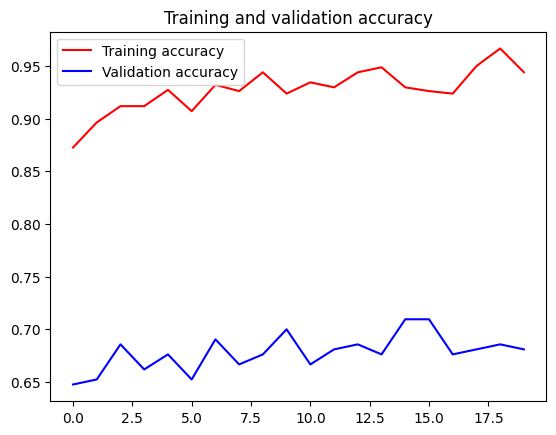

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
scores = model.evaluate(val_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

7/7 [==============================] - 4s 516ms/step - loss: 1.8699 - accuracy: 0.6810
evaluate accuracy: 68.10%


In [11]:
scores = model.evaluate(train_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

27/27 [==============================] - 22s 807ms/step - loss: 0.0921 - accuracy: 0.9726
evaluate accuracy: 97.26%


(300, 224, 224, 3)


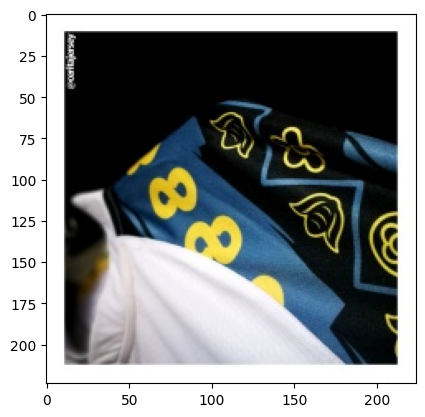

(300, 224, 224, 3)


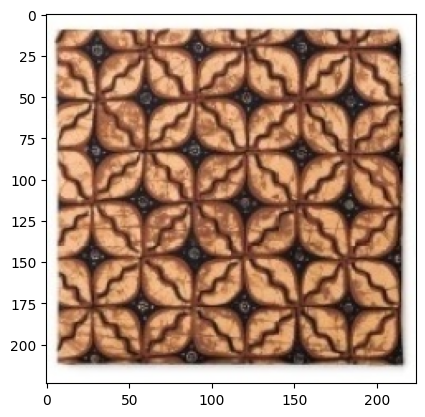

(300, 224, 224, 3)


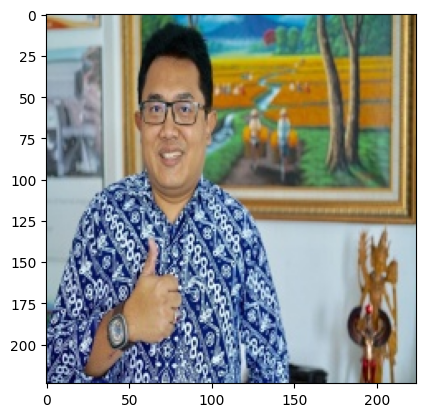

(300, 224, 224, 3)


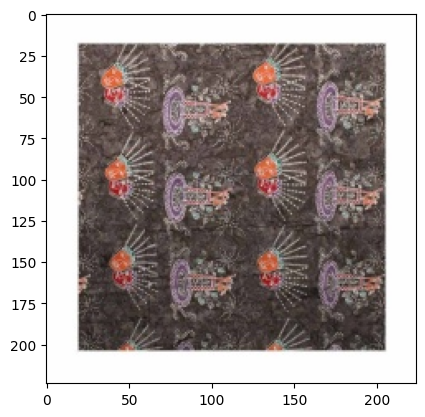

(300, 224, 224, 3)


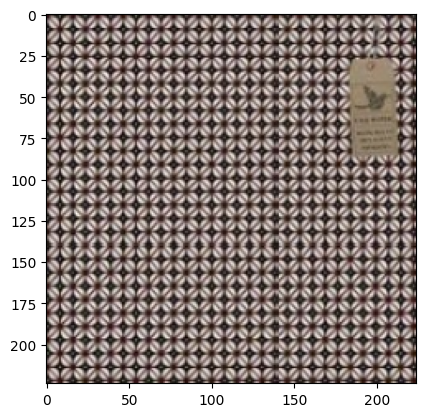

In [18]:
img, label = test_generator.next()
for i in range(5):
    print(img.shape)
    plt.imshow(img[i])
    plt.show()

In [19]:
gen_label = np.argmax(label, axis=1)
classes = os.listdir(train_path)

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Predicted class of generated test images')
print(y_pred, '\n')
print('test_generator image true classes')
print(gen_label, '\n')

conf_mat = confusion_matrix(gen_label, y_pred)
print('Confusion Matrix')
print(conf_mat, '\n')

print('Classification Report')
print(classification_report(gen_label, y_pred, target_names=classes))

1/1 [==============================] - 5s 5s/step
Predicted class of generated test images
[ 3  7 10 14 13  1  7 13 14  6 13 12  2  2 12  0  5  7  8  4  9  2  7  1
 13  7  9 14  7  4  7  5  9  8  7 11 10 10  3  7  9 10  7  7  4  3  6 11
 10 13  2  8 12 14  5  3  5 14 10 10 10  1 10  8 14  5 10 10  2  7 14 14
 12 14  7  2 14  2 10  5 13  4  2  5 12  4  4  5 12  5 10 14  5 11  2 14
  1  1  6  2  9  7 12  1  3  4  6 14  6  1 14  5  9 12  5  9 13  9 14 13
  8  8  3  2  0 13 10  2 14  2  7  5  9 10  1  1 12  2  4  2  2  3 11 14
 10 11  1  2  5 12 11  9  5 10 13  1 11 12  5  0 14  6  3  3  8 14  9 14
  4  8 13 14  5  5  3  6 10 14  6 10 10 14  7  0 14  2 13 11  3  2 10 14
  7 12  3  0 14 11 12  6 10  8  6  0 14  9  0  1 11 14 12 13  8  7  3  3
  9 11 14  3  6 11  6  4  4  3 14  6 13 13 11 13 14  3  2  5  4  3  9  1
  9 11  2  5  3 10 10  7 10  5 11  9  7 11  2 11 11 10  1 14  9  8 12 11
  1  3  4 13 14  3  8  6  9  4  5  7 11  3 14 14  9 11 14  6  7  6 10 10
  1 14  0 13 14  6 14  4  5  7 12

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

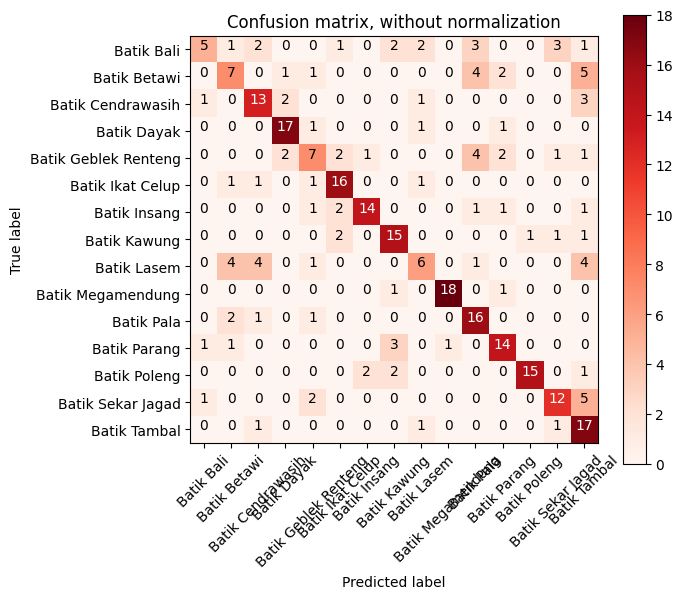

In [22]:
import itertools
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()